## Soft Voting Classifier

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

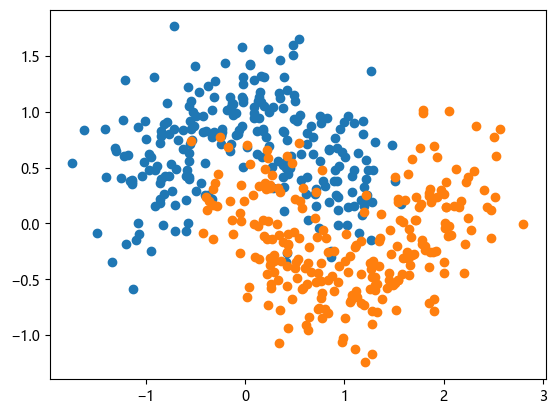

In [44]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 使用 Hard Voting Classifier

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
    voting='hard')

In [47]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.904

### 使用 Soft Voting Classifier

In [48]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
    voting='soft')

In [49]:
voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

0.904